Name : Chathumini B.G.D.T.

Index Number : 190107T

Assignment 1

Question 1

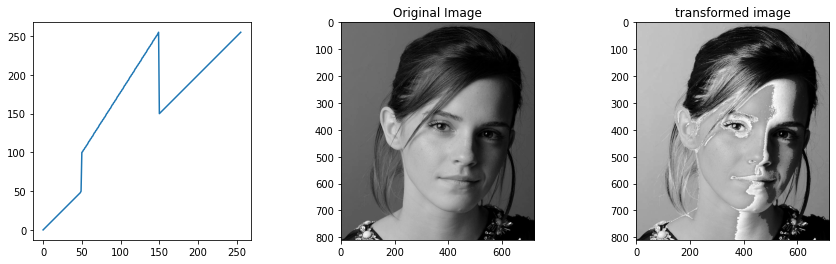

In [46]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

emma =  cv.imread("emma_gray.jpg",cv.IMREAD_GRAYSCALE)
assert emma is not None

# linearly spaced values
t1=np.linspace(0,50,50) 
t2=np.linspace(100,255,100) 
t3=np.linspace(150,255,106) 

transform = np.concatenate((t1,t2,t3), axis = 0).astype(np.uint8)  #connect all 3 transformations 
assert len(transform) == 256
emma_transformed= cv.LUT(emma,transform)

fig, axis = plt.subplots(1,3)
fig.set_figwidth(15)
axis[0].plot(transform)
axis[0].set_aspect('equal')
axis[1].imshow(emma, cmap='gray', vmin=0, vmax=255)
axis[1].set_title("Original Image")
axis[2].imshow(emma_transformed, cmap='gray', vmin=0, vmax=255)
axis[2].set_title("transformed image")
plt.show()

Question 2

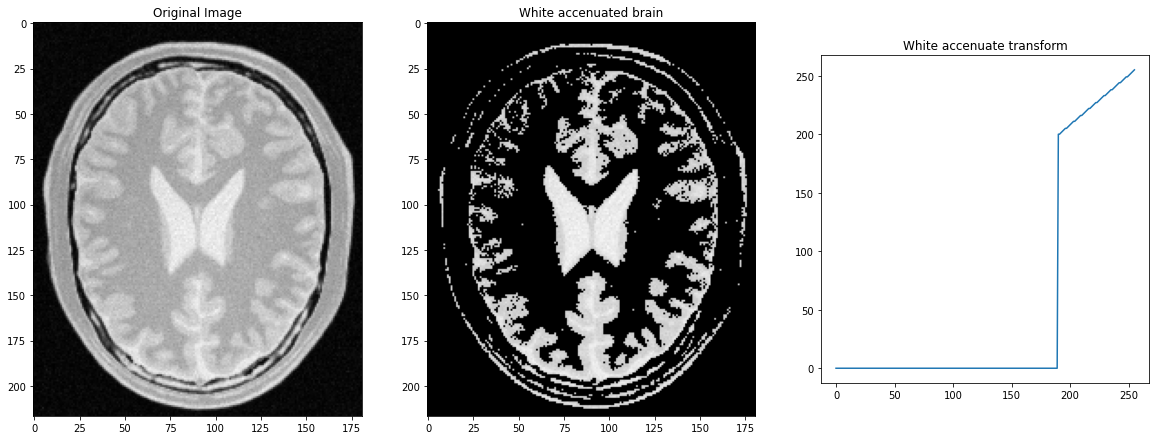

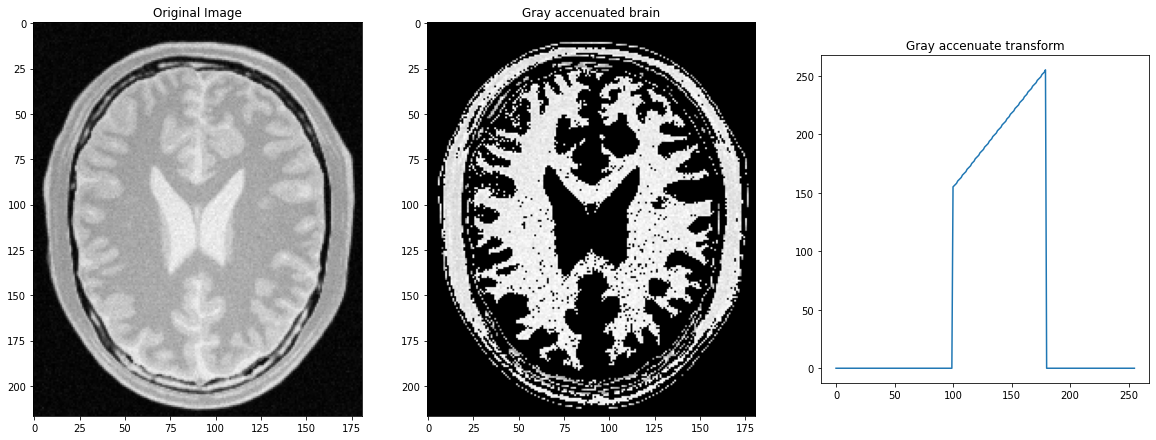

In [20]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

brain =  cv.imread("brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
assert brain is not None

# accenuate white
p1=np.linspace(0,0,190) 
p2=np.linspace(200,255,66) 
accenuate_white = np.concatenate((p1,p2), axis = 0).astype(np.uint8)  #connect all transformations 
assert len(accenuate_white) == 256
white_accenuated_brain = cv.LUT(brain,accenuate_white)

# accenuate Grey 
t1=np.linspace(0,0,100) 
t2=np.linspace(155,255,80)  
t3=np.linspace(0,0,76) 
accenuate_grey = np.concatenate((t1,t2,t3), axis = 0).astype(np.uint8)  #connect all transformations 
assert len(accenuate_grey) == 256
grey_accenuated_brain = cv.LUT(brain,accenuate_grey)

fig1, ax = plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(brain, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Original Image")
ax[1].imshow(white_accenuated_brain, cmap='gray', vmin=0, vmax=255)
ax[1].set_title("White accenuated brain")
ax[2].plot(accenuate_white)
ax[2].set_title("White accenuate transform")
ax[2].set_aspect('equal')

fig2, axis = plt.subplots(1,3,figsize=(20,20))
axis[0].imshow(brain, cmap='gray', vmin=0, vmax=255)
axis[0].set_title("Original Image")
axis[1].imshow(grey_accenuated_brain, cmap='gray', vmin=0, vmax=255)
axis[1].set_title("Gray accenuated brain")
axis[2].plot(accenuate_grey)
axis[2].set_title("Gray accenuate transform")
axis[2].set_aspect('equal')
plt.show()

Question 3

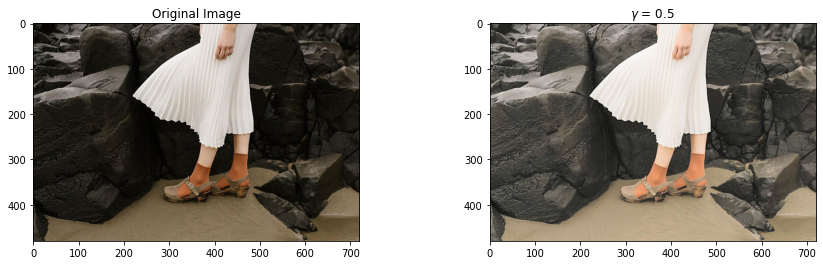

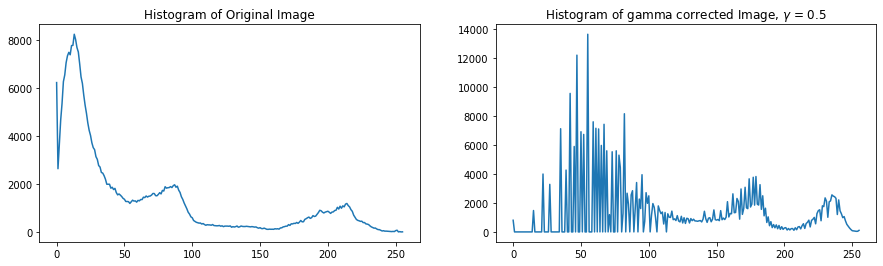

In [33]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im =  cv.imread("highlights_and_shadows.jpg")
assert im is not None

im_lab = cv.cvtColor(im, cv.COLOR_BGR2Lab)
(l,a,b)= cv.split(im_lab) # split the l,a,b components
gamma = 0.5
g_transform = np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8) 
g_transformed = cv.LUT(l, g_transform) # gamma correction for lightness
im_lab[:,:,0]=g_transformed 

im_hist = cv.calcHist([im],[0],None,[256],[0,256])
im_lab_hist = cv.calcHist([im_lab],[0],None,[256],[0,256])

fig, ax = plt.subplots(1,2)
fig.set_figwidth(15)
ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(im_lab, cv.COLOR_Lab2RGB))
ax[1].set_title("$\gamma$ = "+ str(gamma))

fig2, axis = plt.subplots(1,2)
fig2.set_figwidth(15)
axis[0].plot(im_hist)
axis[0].set_title("Histogram of Original Image")
axis[1].plot(im_lab_hist)
axis[1].set_title("Histogram of gamma corrected Image, $\gamma$ = "+ str(gamma))
plt.show()


Question 4

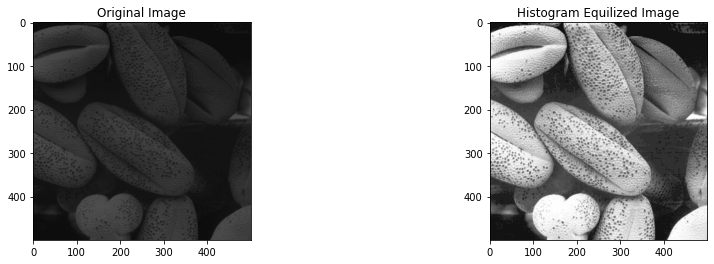

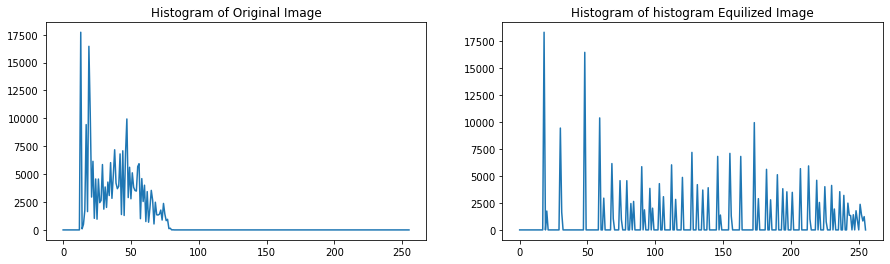

In [6]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

shells =  cv.imread("shells.png",cv.IMREAD_GRAYSCALE)
assert shells is not None
shells_hist = cv.calcHist([shells],[0],None,[256],[0,256])

#normalize
n_pixels = np.sum(shells_hist)
shells_histo = shells_hist/n_pixels

#normalized cumulative histogram
cdf_hist = np.cumsum(shells_histo)

transform = np.floor(255 * cdf_hist).astype(np.uint8)
eq_shells = cv.LUT(shells,transform)
equi_shells_histo = cv.calcHist([eq_shells ],[0],None,[256],[0,256])

fig, ax = plt.subplots(1,2)
fig.set_figwidth(15)
ax[0].imshow(shells , cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Original Image")
ax[1].imshow(eq_shells , cmap='gray', vmin=0, vmax=255)
ax[1].set_title("Histogram Equilized Image")

fig2, axis = plt.subplots(1,2)
fig2.set_figwidth(15)
axis[0].plot(shells_hist)
axis[0].set_title("Histogram of Original Image")
axis[1].plot(equi_shells_histo)
axis[1].set_title("Histogram of histogram Equilized Image")
plt.show()


Question 5

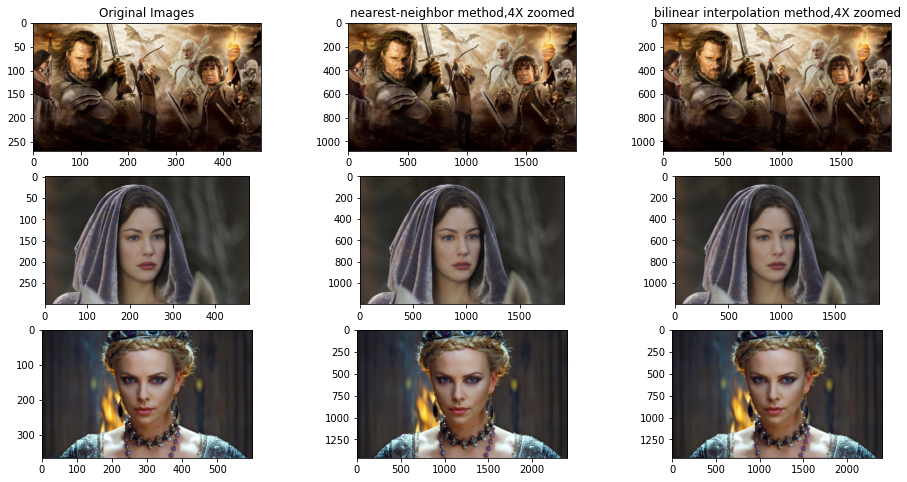

In [26]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math

def zoom_im(image, method, scaling_fact):
    rows, cols =scaling_fact* image.shape[0], scaling_fact* image.shape[1]
    zoomed_img = np.zeros((rows,cols,3),dtype=image.dtype)
    if (method == 0):
        #nearest-neighbor method
        for r in range(rows):
            for c in range(cols):
                im_r, im_c= int(np.round(r/scaling_fact)), int(np.round(c/scaling_fact))
                if im_r >= image.shape[0]:
                    im_r -=1
                if im_c >= image.shape[1]:
                    im_c -=1
                zoomed_img[r][c]= image[im_r][im_c]
        return zoomed_img
    else:
        #bilinear interpolation method
        for r in range(rows-1):
            for c in range(cols-1):
                im_r, im_c= r/scaling_fact, c/scaling_fact
                left_bottom = [math.floor(im_r), math.floor(im_c)]
                right_bottom = [math.floor(im_r), math.ceil(im_c)]
                left_top = [math.ceil(im_r), math.floor(im_c)]
                right_top = [math.ceil(im_r),math.ceil(im_c)]

                if left_top[0] >= image.shape[0]:
                    left_top[0] =image.shape[0] - 1
                    right_top[0] =image.shape[0] - 1
                if right_bottom[1] >= image.shape[1]:
                    right_bottom[1]=image.shape[1] - 1
                    right_top[1] =image.shape[1] - 1
                

                ratio_vertical = im_r-left_bottom[0]
                ratio_horizontal = im_c-left_bottom[1]

                horizontal_1 =ratio_vertical*image[left_top[0]][left_top[1]] +(1-ratio_vertical)*image[left_bottom[0]][left_bottom[1]]
                horizontal_2 =ratio_vertical*image[right_top[0]][right_top[1]] +(1-ratio_vertical)*image[right_bottom[0]][right_bottom[1]]
                zoomed_img[r][c]= np.rint(horizontal_1*(1-ratio_horizontal) + horizontal_2*ratio_horizontal)
        return zoomed_img



#original images
org_img_1 =  cv.imread("im01.png")
assert org_img_1 is not None
org_img_2 =  cv.imread("im02.png")
assert org_img_2 is not None
org_img_3 =  cv.imread("im03.png")
assert org_img_3 is not None

#small images
sm_img_1 =  cv.imread("im01small.png")
assert sm_img_1 is not None
sm_img_2 =  cv.imread("im02small.png")
assert sm_img_2 is not None
sm_img_3 =  cv.imread("im03small.png")
assert sm_img_3 is not None

#Zoom by nearest-neighbor method
nn_1 = zoom_im(sm_img_1, 0, 4)
nn_2 = zoom_im(sm_img_2, 0, 4)
nn_3 = zoom_im(sm_img_3, 0, 4)

#Zoom by bilinear interpolation method
bi_1 = zoom_im(sm_img_1, 1, 4)
bi_2 = zoom_im(sm_img_2, 1, 4)
bi_3 = zoom_im(sm_img_3, 1, 4)

fig, ax = plt.subplots(3,3,figsize =(16,8))

ax[0][0].imshow(cv.cvtColor(sm_img_1, cv.COLOR_BGR2RGB))
ax[0][0].set_title("Original Images")
ax[0][1].imshow(cv.cvtColor(nn_1, cv.COLOR_BGR2RGB))
ax[0][1].set_title("nearest-neighbor method,4X zoomed")
ax[0][2].imshow(cv.cvtColor(bi_1, cv.COLOR_BGR2RGB))
ax[0][2].set_title("bilinear interpolation method,4X zoomed")

ax[1][0].imshow(cv.cvtColor(sm_img_2, cv.COLOR_BGR2RGB))
ax[1][1].imshow(cv.cvtColor(nn_2, cv.COLOR_BGR2RGB))
ax[1][2].imshow(cv.cvtColor(bi_2, cv.COLOR_BGR2RGB))

ax[2][0].imshow(cv.cvtColor(sm_img_3, cv.COLOR_BGR2RGB))
ax[2][1].imshow(cv.cvtColor(nn_3, cv.COLOR_BGR2RGB))
ax[2][2].imshow(cv.cvtColor(bi_3, cv.COLOR_BGR2RGB))
plt.show()



In [27]:
nn_ssd=np.sum((org_img_2[:,:,0:3]-nn_2[:,:,0:3])**2)/org_img_2.size
bi_ssd=np.sum((org_img_2[:,:,0:3]-bi_2[:,:,0:3])**2)/org_img_2.size
print("SSD for nearest-neighbor", nn_ssd)
print("SSD for bilinear interpolation", bi_ssd)



SSD for nearest-neighbor 16.792970920138888
SSD for bilinear interpolation 16.40395240162037


Question 6

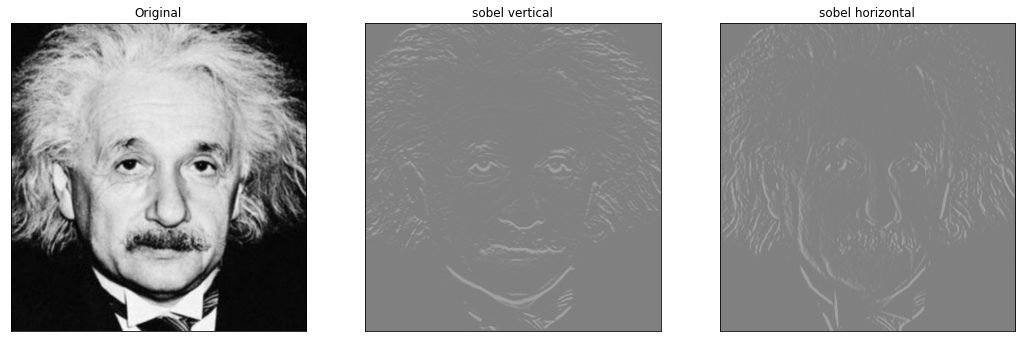

In [24]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import stats

einstein = cv.imread("einstein.png",cv.IMREAD_GRAYSCALE)
assert einstein is not None

sobel_v = np.array([(-1,-2,-1),(0,0,0),(1,2,1)],dtype=np.float32)
einstein_x = cv.filter2D(einstein,-1,sobel_v)
sobel_h = np.array([(-1,0,1),(-2,0,2),(-1,0,1)],dtype=np.float32)
einstein_y = cv.filter2D(einstein,-1,sobel_h)

fig, ax =plt.subplots(1,3, sharex ='all', sharey ='all', figsize=(18,18))

ax[0].imshow(einstein,cmap='gray',vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].set_xticks([]),ax[0].set_yticks([])

ax[1].imshow(einstein_x,cmap='gray', vmin=-1020, vmax=1020)
ax[1].set_title("sobel vertical")
ax[1].set_xticks([]),ax[1].set_yticks([])

ax[2].imshow(einstein_y ,cmap='gray',  vmin=-1020, vmax=1020)
ax[2].set_title("sobel horizontal")
ax[2].set_xticks([]),ax[2].set_yticks([])
plt.show()

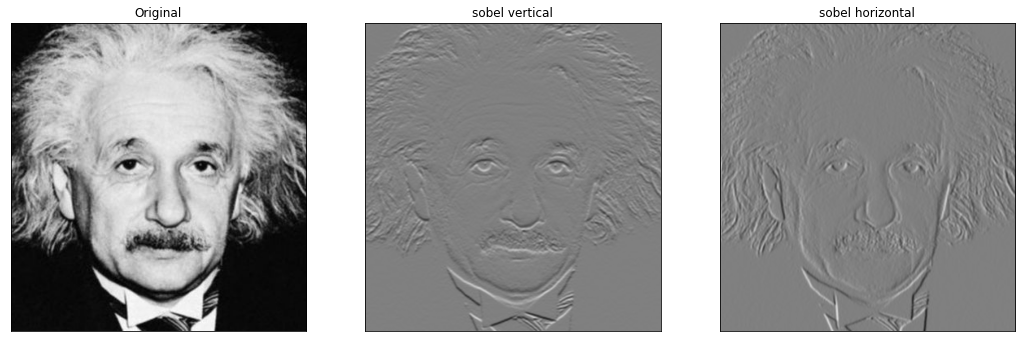

In [35]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math


einstein = cv.imread("einstein.png",cv.IMREAD_GRAYSCALE)
assert einstein is not None


def sobel_filter(image,kernal):
    
    [r,c]= image.shape
    filtered_image = np.zeros((r,c),dtype=np.float32)
    padded_array = np.zeros((r+2,c+2),dtype=np.float32)
    padded_array[1:r+1,1:c+1] = image
    n=1
    m=1
    height_kernal=math.floor(kernal.shape[0]/2)
    if len(kernal.shape)==1:
        width_kernal=0
        m=2
    else:
        width_kernal=math.floor(kernal.shape[1]/2)
        if kernal.shape[1]==1:
            m=2
    if kernal.shape[0]==1:
        n=2
        
    
    for row in range(height_kernal,r+2-height_kernal-n):
        for col in range(width_kernal,c+2-width_kernal-m):
            filtered_image[row,col]=np.dot(padded_array[row-height_kernal:row+height_kernal+1,col-width_kernal:col+width_kernal+1].flatten(),kernal.flatten())
    
    return filtered_image

image_v =sobel_filter(einstein,sobel_v )
image_h =sobel_filter(einstein,sobel_h )
fig, ax =plt.subplots(1,3, sharex ='all', sharey ='all', figsize=(18,18))

ax[0].imshow(einstein,cmap='gray',vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].set_xticks([]),ax[0].set_yticks([])

ax[1].imshow(image_v,cmap='gray', vmin=-1020, vmax=1020)
ax[1].set_title("sobel vertical")
ax[1].set_xticks([]),ax[1].set_yticks([])

ax[2].imshow(image_h ,cmap='gray',  vmin=-1020, vmax=1020)
ax[2].set_title("sobel horizontal")
ax[2].set_xticks([]),ax[2].set_yticks([])
plt.show()
    

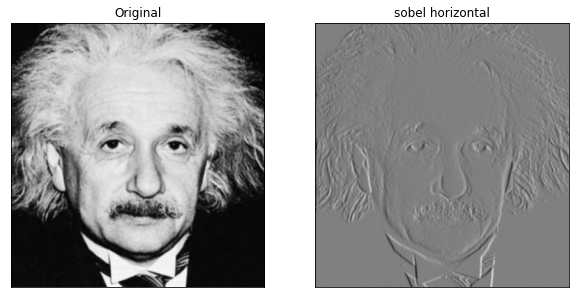

In [40]:
sobel_h1=np.array([(1),(2),(1)] ,dtype=np.float32)
sobel_h2=np.array([(1,0,-1)] ,dtype=np.float32)

filltered_1=sobel_filter(einstein,sobel_h1)
Filtered_2=sobel_filter(filltered_1,sobel_h2)

fig, ax =plt.subplots(1,2, sharex ='all', sharey ='all', figsize=(10,10))
ax[0].imshow(einstein,cmap='gray',vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].set_xticks([]),ax[0].set_yticks([])

ax[1].imshow(Filtered_2,cmap='gray',  vmin=-1020, vmax=1020)
ax[1].set_title("sobel horizontal")
ax[1].set_xticks([]),ax[1].set_yticks([])
plt.show()

Question 7

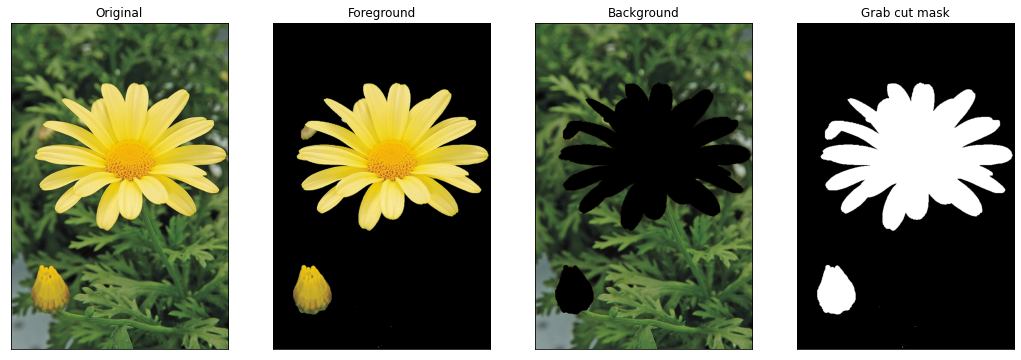

In [29]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

daisy =  cv.imread("daisy.jpg")

mask = np.zeros(daisy.shape[:2],dtype=daisy.dtype)
rectangle= (40,40,540,800)
background_mask = np.zeros((1, 65), np.float64)
foreground_mask = np.zeros((1, 65), np.float64)

cv.grabCut(daisy, mask, rectangle, background_mask, foreground_mask, 15, cv.GC_INIT_WITH_RECT)

grab_cut_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
daisy_fg = daisy*grab_cut_mask[:,:,np.newaxis]
daisy_bg=np.subtract(daisy,daisy_fg)

fig, ax =plt.subplots(1,4, sharex ='all', sharey ='all', figsize=(18,6))

ax[0].imshow(cv.cvtColor(daisy, cv.COLOR_BGR2RGB))
ax[0].set_title("Original")
ax[0].set_xticks([]),ax[0].set_yticks([])

ax[1].imshow(cv.cvtColor(daisy_fg, cv.COLOR_BGR2RGB))
ax[1].set_title("Foreground")
ax[1].set_xticks([]),ax[1].set_yticks([])

ax[2].imshow(cv.cvtColor(daisy_bg, cv.COLOR_BGR2RGB))
ax[2].set_title("Background")
ax[2].set_xticks([]),ax[2].set_yticks([])

ax[3].imshow(cv.cvtColor(255*grab_cut_mask, cv.COLOR_BGR2RGB))
ax[3].set_title("Grab cut mask")
ax[3].set_xticks([]),ax[3].set_yticks([])

plt.show()

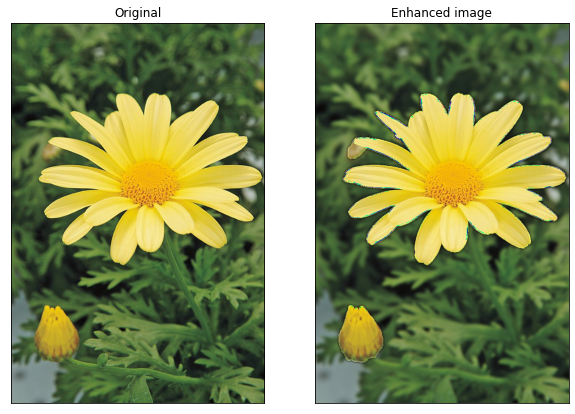

In [33]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

k_size = 9
sigma = 4
blurred_bg =cv.GaussianBlur(daisy_bg,(k_size,k_size),sigma)

enhanced_daisy=np.add(daisy_fg,blurred_bg)

fig, ax =plt.subplots(1,2, sharex ='all', sharey ='all', figsize=(10,10))

ax[0].imshow(cv.cvtColor(daisy, cv.COLOR_BGR2RGB))
ax[0].set_title("Original")
ax[0].set_xticks([]),ax[0].set_yticks([])

ax[1].imshow(cv.cvtColor(enhanced_daisy, cv.COLOR_BGR2RGB))
ax[1].set_title("Enhanced image")
ax[1].set_xticks([]),ax[1].set_yticks([])

plt.show()